In [9]:
import pandas as pd
#need to pip install pyxlsb
#need to pip install openpyxl pour le .xlsx
import matplotlib.pyplot as plt


## Création de la base de donnée relatives aux résultats de l'élection communale de 2020
Pour des fins de comparabilité, nous avons choisit de concentrer notre analyse sur les communes de France métropolitaine (donc sans les données des DROMs, COMs, Terres australes et de Nouvelle Calédonie). Pour ce faire, nous avons récupéré la base de donnée des résultats à laquelle nous avons rajouté la nuance politique da la liste élue par *merging* avec la base de donnée des candidats. Cette donnée n'est disponible que pour les communes de plus de 3 500 habitants 

In [10]:
#on fait le choix d'enlever les DROM, les COM, les Terres australes et la Nouvelle-Calédonie : code de département None ou supérieurs à 900
#le département de corse du sud sera noté 201 au lieu de 2A et haute corse 202 au lieu de 2B
elus_2020 = pd.read_parquet('/home/onyxia/work/Python-project/Data/elus-conseillers-municipaux-cm.parquet')
elus_2020['Code du département'] = elus_2020['Code du département'].replace('2A', '201')
elus_2020['Code du département'] = elus_2020['Code du département'].replace('2B', '202')
elus_2020['Code du département'] = pd.to_numeric(elus_2020['Code du département'], errors='coerce').astype('Int64')
elus_2020 = elus_2020.dropna(subset=['Code du département'])
elus_2020 = elus_2020[elus_2020['Code du département']<900]
elus_2020 = elus_2020[elus_2020['Libellé de la fonction']=='Maire']

elus_2020 = elus_2020.drop(columns=['Code de la collectivité à statut particulier', 'Libellé de la collectivité à statut particulier','Libellé de la fonction'])

elus_2020.head(10)

,Code du département,Libellé du département,Code de la commune,Libellé de la commune,Nom de l'élu,Prénom de l'élu,Code sexe,Date de naissance,Code de la catégorie socio-professionnelle,Libellé de la catégorie socio-professionnelle,Date de début du mandat,Date de début de la fonction,Code nationalité
3,1,Ain,01001,L'Abergement-Clémenciat,BOULON,Daniel,M,1951-04-03,74,Ancien cadre,2020-05-18,2020-05-26,FR
21,1,Ain,01002,L'Abergement-De-Varey,ORSET,Max,M,1947-02-11,65,"Ouvrier qualifié de la manutention, du magasin...",2020-05-18,2020-05-27,FR
37,1,Ain,01004,Ambérieu-En-Bugey,FABRE,Daniel,M,1961-07-09,74,Ancien cadre,2020-05-18,2020-05-28,FR
60,1,Ain,01005,Ambérieux-En-Dombes,FORNES,Christine,F,1962-06-07,21,Artisan,2021-02-05,2021-07-05,FR
77,1,Ain,01006,Ambléon,BIONDA,Annie,F,1951-11-28,77,Ancien employé,2020-05-18,2020-05-25,FR
95,1,Ain,01007,Ambronay,MANCUSO,Vincent,M,1960-02-07,74,Ancien cadre,2023-03-26,2023-03-31,FR
110,1,Ain,01008,Ambutrix,DELOFFRE,Dominique,M,1962-03-10,37,Cadre administratif et commercial d'entreprise,2020-05-18,2020-05-25,FR
123,1,Ain,01009,Andert-Et-Condon,GUILLERMIN,Patrick,M,1965-07-20,22,Commerçant et assimilé,2020-05-18,2020-05-28,FR
131,1,Ain,01011,Apremont,DOCHE,Claude,M,1943-12-16,74,Ancien cadre,2020-06-28,2020-06-28,FR
143,1,Ain,01012,Aranc,MATHIEU,Daniel,M,1948-02-04,74,Ancien cadre,2020-06-28,2020-05-07,FR


In [11]:
candidats_2020 = pd.read_excel('/home/onyxia/work/Python-project/Data/livre-des-listes-et-candidats-2020.xlsb', header=2)

In [12]:
candidats_2020['Code du département'] = candidats_2020['Code du département'].replace('2A', '201')
candidats_2020['Code du département'] = candidats_2020['Code du département'].replace('2B', '202')
candidats_2020['Code du département'] = pd.to_numeric(candidats_2020['Code du département'], errors='coerce').astype('Int64')
candidats_2020 = candidats_2020.dropna(subset=['Code du département'])
candidats_2020 = candidats_2020[candidats_2020['N° candidat']==1]

candidats_2020 = candidats_2020[['Code du département', 'Code commune','Libellé commune', 'Nuance Liste', 'Nom candidat', 'Prénom candidat' ]]
candidats_2020['Code commune'] = candidats_2020['Code du département'].astype(str).str.zfill(2) + candidats_2020['Code commune'].astype(str).str.zfill(3)

candidats_2020.head(10)

,Code du département,Code commune,Libellé commune,Nuance Liste,Nom candidat,Prénom candidat
0,1,01004,Ambérieu-en-Bugey,LDVC,FABRE,Daniel
35,1,01004,Ambérieu-en-Bugey,LDVG,MARINO-MORABITO,Antoine
69,1,01004,Ambérieu-en-Bugey,LEXG,BOUVET,Patrick
102,1,01004,Ambérieu-en-Bugey,LDVG,CHRISTIN,Rémi
137,1,01005,Ambérieux-en-Dombes,NaN,PERNET,Pierre
156,1,01007,Ambronay,NaN,BARILLOT,Marie-Christine
179,1,01007,Ambronay,NaN,MANCUSO,Vincent
203,1,01010,Anglefort,NaN,THIBOUD,Bernard
218,1,01014,Arbent,NaN,CRACCHIOLO,Philippe
241,1,01014,Arbent,NaN,GERVASONI,Dominique


In [13]:
elec_2020 = pd.merge(
    left=elus_2020, 
    right=candidats_2020,
    how='inner',
    left_on=['Code de la commune', "Nom de l'élu", "Prénom de l'élu"],
    right_on=['Code commune', "Nom candidat", "Prénom candidat"] 
)

elec_2020 = elec_2020.drop(columns=['Code sexe', 'Date de naissance', 'Code de la catégorie socio-professionnelle', 'Libellé de la catégorie socio-professionnelle',
'Date de début du mandat', 'Date de début de la fonction', 'Code nationalité', 'Code du département_y', 'Code de la commune', 'Libellé de la commune',
'Nom candidat', "Prénom candidat"])
elec_2020.rename(columns={"Code du département_x": "Code département"})

elec_2020.head(10)

,Code du département_x,Libellé du département,Nom de l'élu,Prénom de l'élu,Code commune,Libellé commune,Nuance Liste
0,1,Ain,FABRE,Daniel,01004,Ambérieu-en-Bugey,LDVC
1,1,Ain,MANCUSO,Vincent,01007,Ambronay,NaN
2,1,Ain,CRACCHIOLO,Philippe,01014,Arbent,NaN
3,1,Ain,PACCAUD,Richard,01021,Ars-sur-Formans,NaN
4,1,Ain,DESCHAMPS,Roland,01022,Artemare,NaN
5,1,Ain,MARTIN,Walter,01024,Attignat,NaN
6,1,Ain,BERNIGAUD,Christian,01025,Bâgé-Dommartin,LDIV
7,1,Ain,MEANT,Patrick,01027,Balan,NaN
8,1,Ain,RAVET,Véronique,01031,Bellignat,LDVG
9,1,Ain,PETIT,Régis,01033,Valserhône,LDVD


## Création de la base de donnée relatives aux résultats de l'élection communale de 2014
Comme pour la base précédente, une étape de filtrage est d'abord nécessaire sur la base importée, une adaptation de la base au traitement, on restreint les variables présentes à celles qui nous intéresse et on détermine ensuite l'élu pour chaque commune avec sa nuance politique.

In [14]:
resultats_2014 = pd.read_excel('/home/onyxia/work/Python-project/Data/muni-2014-resultats-com-1000-et-plus-t2.xlsx', header=0)
resultats_2014.head(10)

,Date de l'export,Code du département,Type de scrutin,Libellé du département,Code de la commune,Libellé de la commune,Inscrits,Abstentions,% Abs/Ins,Votants,...,Unnamed: 623,Unnamed: 624,Unnamed: 625,Unnamed: 626,Unnamed: 627,Unnamed: 628,Unnamed: 629,Unnamed: 630,Unnamed: 631,Unnamed: 632
0,2014-03-31 09:33:41,1,LI2,AIN,4,Ambérieu-en-Bugey,8198,3619,44.14,4579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-03-31 09:33:41,1,LI2,AIN,7,Ambronay,1770,434,24.52,1336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-03-31 09:33:41,1,LI2,AIN,34,Belley,5680,1557,27.41,4123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-03-31 09:33:41,1,LI2,AIN,160,Ferney-Voltaire,4070,1882,46.24,2188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-03-31 09:33:41,1,LI2,AIN,185,Hauteville-Lompnes,2252,803,35.66,1449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2014-03-31 09:33:41,1,LI2,AIN,194,Jassans-Riottier,3966,1204,30.36,2762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2014-03-31 09:33:41,1,LI2,AIN,249,Miribel,6526,2758,42.26,3768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2014-03-31 09:33:41,1,LI2,AIN,262,Montluel,4393,1519,34.58,2874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2014-03-31 09:33:41,1,LI2,AIN,263,Montmerle-sur-Saône,2678,914,34.13,1764,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2014-03-31 09:33:41,1,LI2,AIN,290,Pérouges,958,273,28.50,685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Remplacer les codes Corse
resultats_2014['Code du département'] = resultats_2014['Code du département'].replace({'2A': '201', '2B': '202'})

# Convertir en Int64 et forcer NaN si non convertible
resultats_2014['Code du département'] = pd.to_numeric(resultats_2014['Code du département'], errors='coerce').astype('Int64')

# Supprimer les DROM/COM/TAAF/Nouvelle-Calédonie (codes >900 ou NaN)
resultats_2014 = resultats_2014.dropna(subset=['Code du département'])
resultats_2014 = resultats_2014[resultats_2014['Code du département'] <= 900]

# Créer un code commune unique : 2 chiffres département + 3 chiffres commune
resultats_2014['Code commune'] = (
    resultats_2014['Code du département'].astype(str).str.zfill(2) +
    resultats_2014['Code de la commune'].astype(str).str.zfill(3)
    )

# Vérification
resultats_2014.head(10)

,Date de l'export,Code du département,Type de scrutin,Libellé du département,Code de la commune,Libellé de la commune,Inscrits,Abstentions,% Abs/Ins,Votants,...,Unnamed: 624,Unnamed: 625,Unnamed: 626,Unnamed: 627,Unnamed: 628,Unnamed: 629,Unnamed: 630,Unnamed: 631,Unnamed: 632,Code commune
0,2014-03-31 09:33:41,1,LI2,AIN,4,Ambérieu-en-Bugey,8198,3619,44.14,4579,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01004
1,2014-03-31 09:33:41,1,LI2,AIN,7,Ambronay,1770,434,24.52,1336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01007
2,2014-03-31 09:33:41,1,LI2,AIN,34,Belley,5680,1557,27.41,4123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01034
3,2014-03-31 09:33:41,1,LI2,AIN,160,Ferney-Voltaire,4070,1882,46.24,2188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01160
4,2014-03-31 09:33:41,1,LI2,AIN,185,Hauteville-Lompnes,2252,803,35.66,1449,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01185
5,2014-03-31 09:33:41,1,LI2,AIN,194,Jassans-Riottier,3966,1204,30.36,2762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01194
6,2014-03-31 09:33:41,1,LI2,AIN,249,Miribel,6526,2758,42.26,3768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01249
7,2014-03-31 09:33:41,1,LI2,AIN,262,Montluel,4393,1519,34.58,2874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01262
8,2014-03-31 09:33:41,1,LI2,AIN,263,Montmerle-sur-Saône,2678,914,34.13,1764,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01263
9,2014-03-31 09:33:41,1,LI2,AIN,290,Pérouges,958,273,28.50,685,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01290


In [16]:
df = resultats_2014.copy()

# Colonnes de commune à conserver
commune_cols = ['Code commune', 'Libellé de la commune']

# Champs candidats dans l'ordre physique
candidate_fields = ['Code Nuance','Sexe','Nom','Prénom','Liste',
                    'Sièges / Elu','Sièges Secteur','Sièges CC','Voix','% Voix/Ins','% Voix/Exp']
k = len(candidate_fields)

# Position du premier bloc
cols = list(df.columns)
start = cols.index('Code Nuance')
nblocks = (len(cols) - start) // k
if nblocks <= 0:
    raise ValueError("Aucun bloc candidat complet détecté après 'Code Nuance'.")

# Liste pour stocker les futurs lignes par bloc
dfs = []

for b in range(nblocks):
    blk_cols = cols[start + b*k : start + (b+1)*k]
    if len(blk_cols) < k:
        continue
    cand_df = df[commune_cols + blk_cols].copy()
    # renommer colonnes du bloc selon candidate_fields
    cand_df = cand_df.rename(columns=dict(zip(blk_cols, candidate_fields)))
    # ajouter colonne numéro du candidat
    cand_df['Ordre_candidat'] = b + 1
    # filtrer les lignes vides (Nom manquant)
    cand_df = cand_df[cand_df['Nom'].notna() & (cand_df['Nom'].str.strip() != '')]
    dfs.append(cand_df)
# concaténer tous les blocs
long_df = pd.concat(dfs, ignore_index=True)

print(f"Blocs détectés: {nblocks} — Lignes candidats produites: {len(long_df)}")

# trier par commune puis par ordre du candidat
long_df_sorted = long_df.sort_values(
    by=['Code commune', 'Ordre_candidat']
).reset_index(drop=True)

# affichage
display(long_df_sorted.head(10))


Blocs détectés: 56 — Lignes candidats produites: 4722


,Code commune,Libellé de la commune,Code Nuance,Sexe,Nom,Prénom,Liste,Sièges / Elu,Sièges Secteur,Sièges CC,Voix,% Voix/Ins,% Voix/Exp,Ordre_candidat
0,01004,Ambérieu-en-Bugey,LDVG,F,EXPOSITO,Josiane,AMBERIEU AMBITION,3,0.0,1.0,949.0,11.58,21.73,1
1,01004,Ambérieu-en-Bugey,LDVG,F,PIDOUX,Catherine,VIVONS NOTRE VILLE,3,0.0,0.0,741.0,9.04,16.96,2
2,01004,Ambérieu-en-Bugey,LDVD,M,FABRE,Daniel,PAROLE AUX AMBARROIS,27,0.0,7.0,2678.0,32.67,61.31,3
3,01007,Ambronay,LDVG,F,LEVRAT,Gisèle,AMBRONAY POUR TOUS,14,0.0,2.0,610.0,34.46,46.78,1
4,01007,Ambronay,LDVD,M,FOURNIER,Gabriel,AMBRONAY Demain,1,0.0,0.0,153.0,8.64,11.73,2
5,01007,Ambronay,LDVD,M,MANCUSO,Vincent,AGIR ENSEMBLE POUR L'AVENIR D'AMBRONAY,4,0.0,0.0,541.0,30.56,41.49,3
6,01034,Belley,LSOC,M,FOGNINI,Jean-Marc,CONTINUONS BELLEY ENSEMBLE,7,0.0,4.0,1936.0,34.08,48.83,1
7,01034,Belley,LDVD,M,JIMENEZ,Christian,BELLEY NOUVEL HORIZON 2014,22,0.0,14.0,2029.0,35.72,51.17,2
8,01160,Ferney-Voltaire,LDVG,M,MEYLAN,François,FERNEY AVENIR 2014,7,0.0,1.0,1056.0,25.95,49.55,1
9,01160,Ferney-Voltaire,LDVD,M,RAPHOZ,Daniel,FERNEY-VOLTAIRE VALEURS COMMUNES,22,0.0,4.0,1075.0,26.41,50.45,2


In [17]:
#Identifier le vainqueur par commune
winners_df = long_df.loc[long_df.groupby(['Code commune'])['% Voix/Exp'].idxmax()].reset_index(drop=True)

print(f"Nombre de lignes : {len(winners_df)}")
display(winners_df.head(5))


Nombre de lignes : 1675


,Code commune,Libellé de la commune,Code Nuance,Sexe,Nom,Prénom,Liste,Sièges / Elu,Sièges Secteur,Sièges CC,Voix,% Voix/Ins,% Voix/Exp,Ordre_candidat
0,01004,Ambérieu-en-Bugey,LDVD,M,FABRE,Daniel,PAROLE AUX AMBARROIS,27,0.0,7.0,2678.0,32.67,61.31,3
1,01007,Ambronay,LDVG,F,LEVRAT,Gisèle,AMBRONAY POUR TOUS,14,0.0,2.0,610.0,34.46,46.78,1
2,01034,Belley,LDVD,M,JIMENEZ,Christian,BELLEY NOUVEL HORIZON 2014,22,0.0,14.0,2029.0,35.72,51.17,2
3,01160,Ferney-Voltaire,LDVD,M,RAPHOZ,Daniel,FERNEY-VOLTAIRE VALEURS COMMUNES,22,0.0,4.0,1075.0,26.41,50.45,2
4,01185,Hauteville-Lompnes,LUDI,M,ARGENTI,Bernard,OSONS L'AVENIR,22,0.0,6.0,815.0,36.19,61.28,2


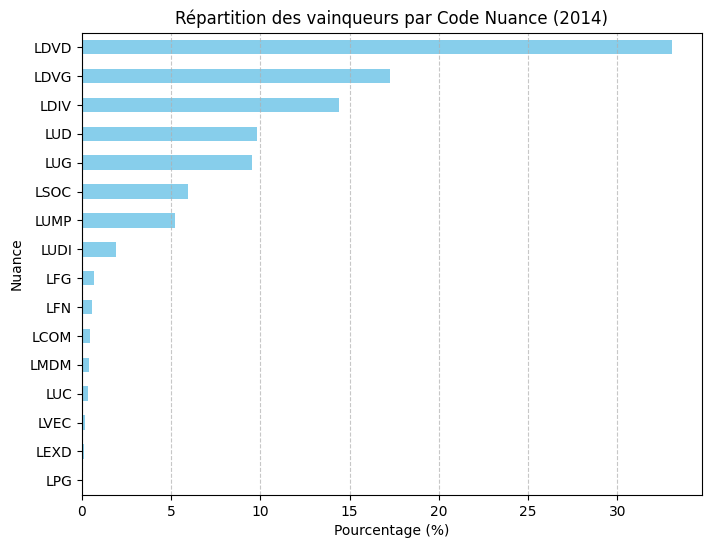

In [ ]:
# Compter le nombre de vainqueurs par nuance
counts = winners_df['Code Nuance'].value_counts(normalize=True) * 100  # en pourcentage

# Tri décroissant
counts = counts.sort_values(ascending=True)

# Graphique horizontal
plt.figure(figsize=(8,6))
counts.plot(kind='barh', color='skyblue')
plt.xlabel('Pourcentage (%)')
plt.ylabel('Nuance')
plt.title('Répartition des vainqueurs par Code Nuance (2014)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



## Statistiques descriptives sur les bases de données 
Pour rappel, nous avons importé les résultats des élections communales de 2020 pour les communes de plus de 3500 habitants, les résultats de 2014. Commençons à comparer ces 2 bases.

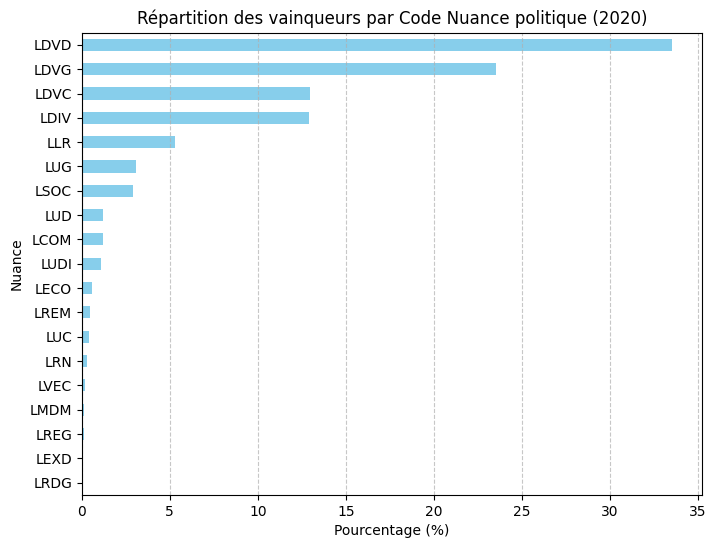

In [21]:
# Compter le nombre de vainqueurs par nuance
counts = elec_2020['Nuance Liste'].value_counts(normalize=True) * 100  # en pourcentage

# Tri décroissant
counts = counts.sort_values(ascending=True)

# Graphique horizontal
plt.figure(figsize=(8,6))
counts.plot(kind='barh', color='skyblue')
plt.xlabel('Pourcentage (%)')
plt.ylabel('Nuance')
plt.title('Répartition des vainqueurs par Code Nuance politique (2020)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Communes exclues (NA) : 498
Pourcentage de communes ayant changé de nuance : 66.9%


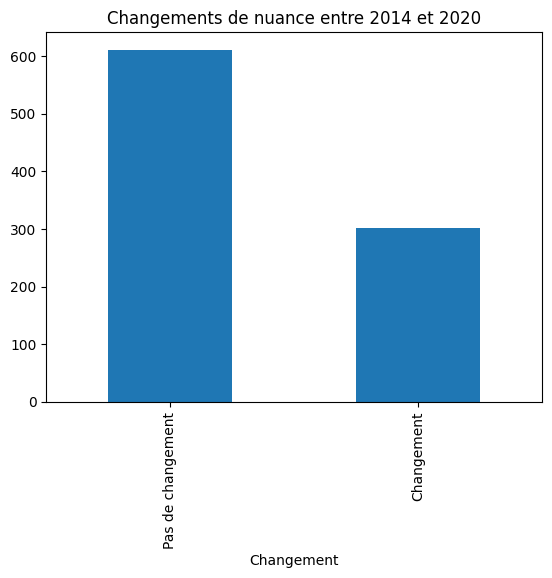

     Code commune Nuance_2014 Nuance_2020
0           01004        LDVD        LDVC
1           01007        LDVG         NaN
2           01034        LDVD        LDVD
3           01160        LDVD        LDVD
4           01185        LUDI        LDVD
...           ...         ...         ...
1406        95572         LUG        LDVG
1407        95580        LDIV         NaN
1408        95582        LDVD        LDVD
1409        95607        LUMP        LDVD
1410        95612        LDVG        LDVG

[1411 rows x 3 columns]


In [39]:
w14 = winners_df[['Code commune', 'Code Nuance']].rename(
    columns={'Code Nuance': 'Nuance_2014'}
)

w20 = elec_2020[['Code commune', 'Nuance Liste']].rename(
    columns={'Nuance Liste': 'Nuance_2020'}
)
comparaison = w14.merge(w20, on='Code commune', how='inner')

comparaison_clean = comparaison.dropna(subset=['Nuance_2014', 'Nuance_2020']).copy()

comparaison_clean.loc[:, 'Changement'] = (
    comparaison_clean['Nuance_2014'] != comparaison_clean['Nuance_2020']
)
nb_exclus = len(comparaison) - len(comparaison_clean)
print("Communes exclues (NA) :", nb_exclus)
taux_changement = comparaison_clean['Changement'].mean() * 100
print(f"Pourcentage de communes ayant changé de nuance : {taux_changement:.1f}%")



comparaison_clean['Changement'].value_counts().plot(kind='bar')
plt.xticks([0, 1], ['Pas de changement', 'Changement'])
plt.title("Changements de nuance entre 2014 et 2020")
plt.show()

print(comparaison)



In [41]:
len(elec_2020)
len(winners_df)
sorted(elec_2020['Nuance Liste'].dropna().unique())

communes_change = comparaison_clean[comparaison_clean['Changement']]

print("Nombre de communes ayant changé de nuance :", len(communes_change))
print(communes_change[['Code commune', 'Nuance_2014', 'Nuance_2020']].head(10))


flux = comparaison_clean.groupby(['Nuance_2014', 'Nuance_2020']).size().reset_index(name='Nb_communes')

# Tri par nombre décroissant
flux = flux.sort_values(by='Nb_communes', ascending=False)

print(flux)

##!!!!!! La base de 2020 a 8451 lignes et celle de 2014 en a seulement 1675.

Nombre de communes ayant changé de nuance : 611
   Code commune Nuance_2014 Nuance_2020
0         01004        LDVD        LDVC
4         01185        LUDI        LDVD
5         01194        LDIV        LDVD
6         01249        LDVG        LDVD
11        02173        LDVD        LDVC
16        02810         LFN         LRN
18        03082         LUD        LDVG
19        03095         LUD        LDVD
24        04070        LDVG        LDVC
27        04143        LUDI        LDVC
   Nuance_2014 Nuance_2020  Nb_communes
11        LDVD        LDVD          146
27        LDVG        LDVG           82
10        LDVD        LDVC           46
62         LUD        LDVD           46
83         LUG        LDVG           46
..         ...         ...          ...
85         LUG        LREM            1
88         LUG        LVEC            1
94        LUMP        LSOC            1
96        LVEC        LDVC            1
97        LVEC        LDVG            1

[98 rows x 3 columns]
